In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_faba = pd.read_csv('../researcher_data_priv/faba_success.csv')
df_duo = pd.read_csv('../researcher_data_priv/duo_success.csv')
df_forms = pd.read_csv('../researcher_data_priv/forms.csv')

print(df_faba.head())
print(df_duo.head())
print(df_forms.head())

   Participant  Attempt_1  Attempt_2  Attempt_3  count_attempt
0            1          0          1          1              4
1            2          1          1          1              2
2            3          0          0          0              1
3            4          1          1          1              4
4            5          1          1          1              4
   Participant  Attempt_1  Attempt_2  Attempt_3  count_attempt
0            1          1          1          1              1
1            2          1          1          1              1
2            3          1          1          1              1
3            4          1          1          1              1
4            5          1          1          1              1
   Participant            Timestamp Enter your FULL NAME, not NICKNAME:  \
0            1  12/19/2025 11:53:48                Dimas Anggoro Sakti    
1            2  12/19/2025 12:01:32                      Bryan Anderson   
2            3  12/

Text(0.5, 0, 'Participant')

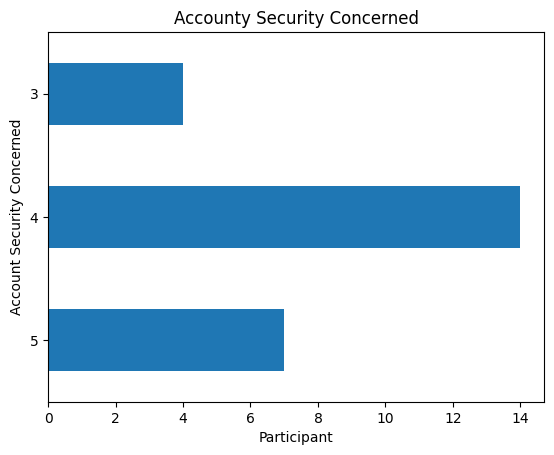

In [22]:
counts = df_forms["account_security"].value_counts().sort_index(ascending=False)

plt.figure()
counts.plot(kind="barh")
plt.title("Accounty Security Concerned")
plt.ylabel("Account Security Concerned")
plt.xlabel("Participant")


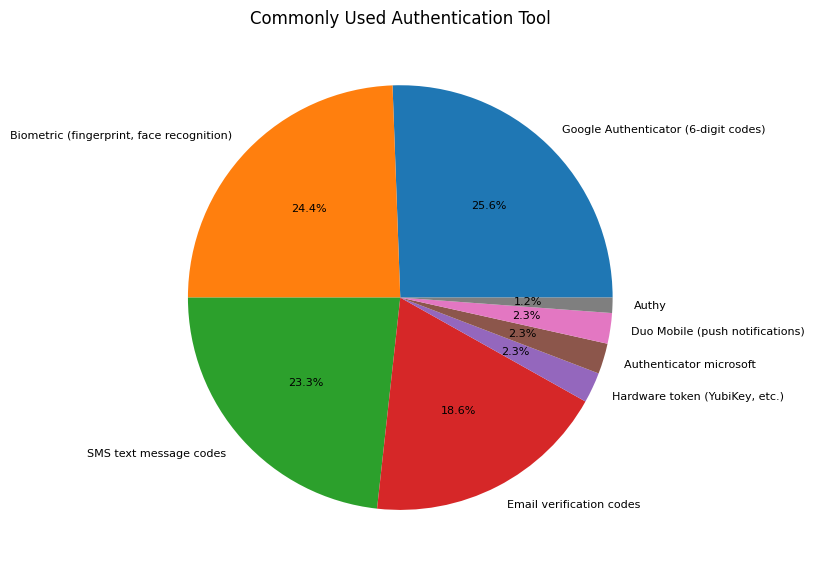

In [30]:
# Common Used Authenticator
methods_series = (
    df_forms["Authenticator_Tool"]
    .dropna()
    .str.split(r",\s(?![^()]*\))")  
    .explode()
    .str.strip()
)

method_counts = methods_series.value_counts()

plt.figure(figsize=(8,8))

method_counts.plot(
    kind="pie",
    autopct='%1.1f%%',
    fontsize=8
)

plt.title("Commonly Used Authentication Tool")
plt.ylabel("")   # pie chart tidak perlu label Y
plt.tight_layout()
plt.show()



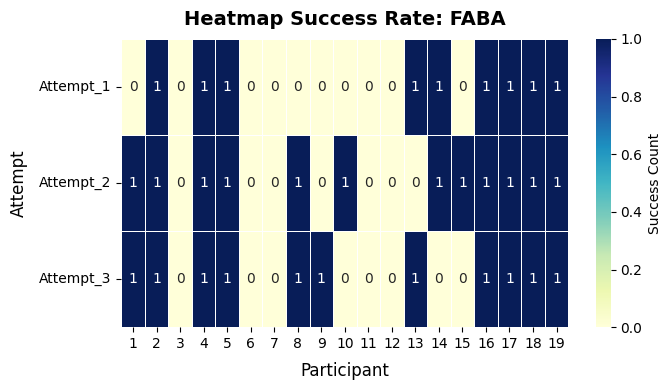

In [24]:
fig, ax = plt.subplots(figsize=(7,4))

df_plot_faba = (
    df_faba
    .set_index('Participant')[['Attempt_1','Attempt_2','Attempt_3']]
    .T
)

sns.heatmap(
    df_plot_faba,
    annot=True,
    fmt='d',
    cmap='YlGnBu',
    cbar_kws={'label': 'Success Count'},
    ax=ax,
    linewidths=0.5,
    linecolor='white'
)

ax.set_title('Heatmap Success Rate: FABA', fontsize=14, fontweight='bold', pad=10)

ax.set_xlabel('Participant', fontsize=12, labelpad=8)
ax.set_ylabel('Attempt', fontsize=12, labelpad=8)

ax.set_xticklabels(ax.get_xticklabels(), ha='center')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()


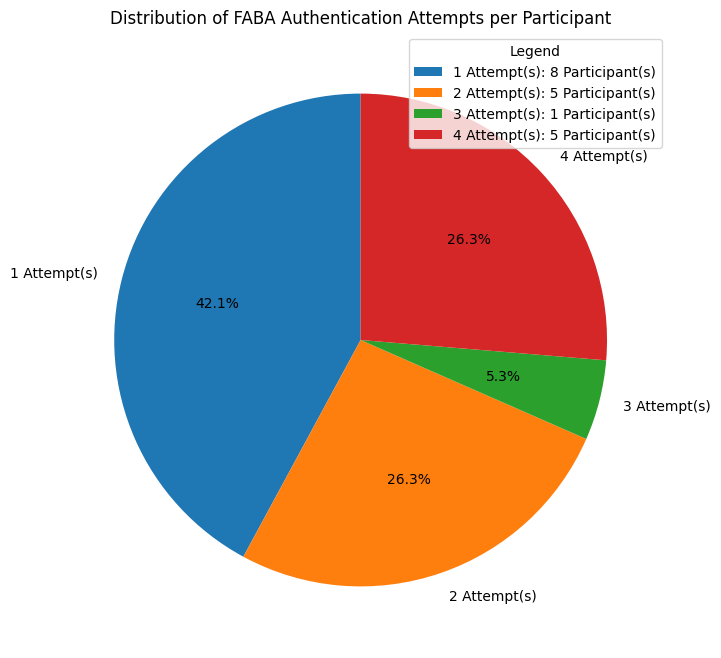

In [25]:
attempt_count = df_faba['count_attempt'].value_counts().sort_index()
percentage = attempt_count / attempt_count.sum() * 100
labels = [f"{i} Attempt(s)" for i in attempt_count.index]

plt.figure(figsize=(8, 8))
plt.pie(
    attempt_count,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Distribution of FABA Authentication Attempts per Participant")
plt.legend(
    labels=[
        f"{attempt} Attempt(s): {count} Participant(s)"
        for attempt, count in attempt_count.items()
    ],
    title="Legend",
    loc="best"
)
plt.show()


# x = np.arange(len(df_faba))

# plt.figure(figsize=(10,6))

# plt.bar(x, df_faba['count_attempt'])

# plt.xticks(x, df_faba['Participant'], ha='center')
# plt.xlabel('Participant')
# plt.ylabel('Count')
# plt.ylim(1, 4)
# plt.yticks([0,1, 2, 3, 4])

# plt.title('Bar Chart Count per Participant')
# plt.grid(axis='y', alpha=0.3)
# plt.show()

# y = np.arange(len(df_duo))

# plt.figure(figsize=(10,6))

# plt.bar(y, df_duo['count_attempt'])

# plt.xticks(y, df_duo['Participant'], ha='center')
# plt.xlabel('Participant')
# plt.ylabel('Count')
# plt.ylim(1, 4)
# plt.yticks([0, 1, 2, 3, 4])

# plt.title('Bar Chart Count per Participant')
# plt.grid(axis='y', alpha=0.3)
# plt.show()

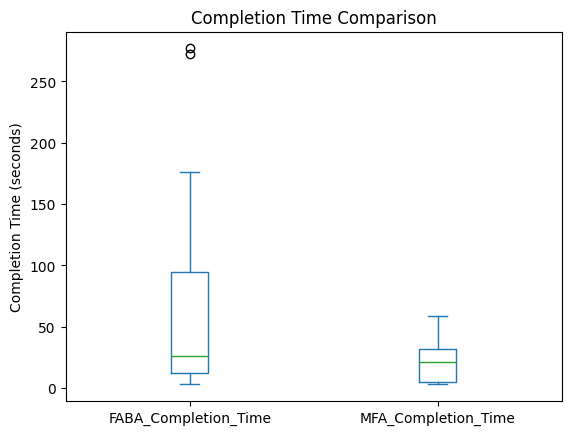

In [26]:
#Bar Chart
# df_forms.plot(
#     x="Participant",
#     y="FABA_Completion_Time",
#     kind="bar",
#     legend=True,
#     rot=360  
# )

# plt.title("FABA Completion Time")
# plt.ylabel("Authentication Completion Time (Seconds)")
# plt.xlabel("Participants")

# plt.tight_layout()
# plt.show()


# df_forms.plot(
#     x="Participant",
#     y="MFA_Completion_Time",
#     kind="bar",
#     legend=False,
#     rot=360
# )

# plt.title("MFA Completion Time")
# plt.ylabel("Authentication Completion Time (Seconds)")
# plt.xlabel("Participants")

# plt.tight_layout()
# plt.show()

#print(df_forms["FABA_Completion_Time"])
#print(df_forms["MFA_Completion_Time"])

#Box Plot
df_forms[["FABA_Completion_Time", "MFA_Completion_Time"]].plot(
    kind="box"
)

plt.ylabel("Completion Time (seconds)")
plt.title("Completion Time Comparison")
plt.show()

['FABA_SUS_1', 'FABA_SUS_2', 'FABA_SUS_3', 'FABA_SUS_4', 'FABA_SUS_5', 'FABA_SUS_6', 'FABA_SUS_7', 'FABA_SUS_8', 'FABA_SUS_9', 'FABA_SUS_10']
['MFA_SUS_1', 'MFA_SUS_2', 'MFA_SUS_3', 'MFA_SUS_4', 'MFA_SUS_5', 'MFA_SUS_6', 'MFA_SUS_7', 'MFA_SUS_8', 'MFA_SUS_9', 'MFA_SUS_10']


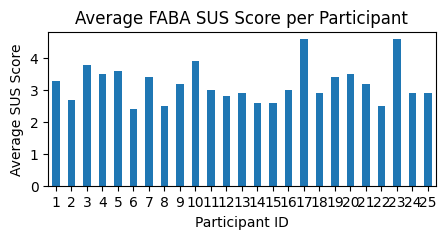

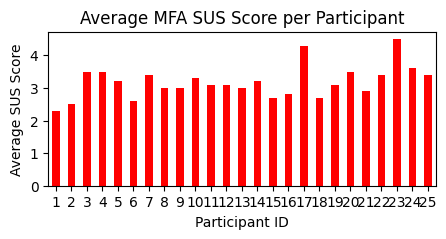

In [27]:
FABA_SUS = [col for col in df_forms.columns if col.startswith("FABA_SUS_")]
df_forms["FABA_SUS_Avg"] = df_forms[FABA_SUS].mean(axis=1)

MFA_SUS = [col for col in df_forms.columns if col.startswith("MFA_SUS_")]
df_forms["MFA_SUS_Avg"] = df_forms[MFA_SUS].mean(axis=1)

print(FABA_SUS)
print(MFA_SUS)

df_forms.plot(
    x="Participant",
    y="FABA_SUS_Avg",
    kind="bar",
    legend=False,
    rot = 360,
    figsize=(5,2)
)
plt.title("Average FABA SUS Score per Participant")
plt.xlabel("Participant ID")
plt.ylabel("Average SUS Score")
plt.show()


df_forms.plot(
    x="Participant",
    y="MFA_SUS_Avg",
    kind="bar",
    legend=False,
    rot = 360,
    color="red",
    figsize=(5,2)
)
plt.title("Average MFA SUS Score per Participant")
plt.xlabel("Participant ID")
plt.ylabel("Average SUS Score")
plt.show()